# Human Activity Time Series Classification

An interesting task in machine learning is classification of time series. In this problem, we will classify the activities of humans based on time series obtained by a Wireless Sensor Network.

## (a) Download the AReM data 
https://archive.ics.uci.edu/ml/datasets/Activity+Recognition+system+based+on+Multisensor+data+fusion+(AReM)

The dataset contains 7 folders that represent seven types of activities. In each folder, there are multiple files each of which represents an instant of a human performing an activity. Each file containis 6 time series collected from activities
of the same person. There are 88 instances in the dataset, each of which contains 6 time series and each time series has 480 consecutive values.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from os.path import join
from sklearn.utils import shuffle

## (b) Split dataset into train and test

Keep datasets 1 and 2 in folders bending1 and bending 2, as well as datasets 1, 2, and 3 in other folders as test data and other datasets as train data.

In [2]:
activities = ['bending1','bending2','cycling','lying','sitting','standing','walking']
#store the numbers of datasets that each activity has
datasetsNums = pd.Series([7, 6, 15, 15, 15, 15, 15], index=activities)
train_data = []
test_data = []
for a in activities:
    for i in range(1, datasetsNums[a] + 1):
        data_path = join("AReM", a, "dataset"+str(i)+".csv")
        #load the dataset
        df = pd.read_csv(data_path,header=None, skiprows=range(0,5), delimiter=",|\s+",engine='python')
        if(i <= 2):
            test_data.append((df, a)) #store each dataset as a tuple of a dataframe and a label
        elif(a != 'bending1' and a != 'bending2' and i == 3):
            test_data.append((df, a))
        else:
            train_data.append((df, a))
datasets = test_data + train_data

## (c) Feature Extraction

### i. Time-domain features

Time-domain features usually used in time series classification:

minimum, maximum, mean, median, standard deviation, variance, root mean square, averaged derivatives, interquartile Range

### ii.

Extract the time-domain features minimum, maximum, mean, median, stan- dard deviation, first quartile, and third quartile for all of the 6 time series in each instance.

In [3]:
newDataset = []
for ds in datasets:
    df = ds[0]
    stats = df.describe()
    stats = stats.loc[['min','max','mean','50%','std','25%','75%']]
    row = pd.Series()
    for i in range(1, 7):
        row['min'+str(i)] = stats.iloc[0,i]
        row['max'+str(i)] = stats.iloc[1,i]
        row['mean'+str(i)] = stats.iloc[2,i]
        row['median'+str(i)] = stats.iloc[3,i]
        row['std'+str(i)] = stats.iloc[4,i]
        row['1st_quart'+str(i)] = stats.iloc[5,i]
        row['3rd_quart'+str(i)] = stats.iloc[6,i]
    row['activity'] = ds[1]
    newDataset.append(row)
newDataset = pd.DataFrame(newDataset)
print("The new dataset:")
newDataset   

The new dataset:


,min1,max1,mean1,median1,std1,1st_quart1,3rd_quart1,min2,max2,mean2,...,1st_quart5,3rd_quart5,min6,max6,mean6,median6,std6,1st_quart6,3rd_quart6,activity
0,37.25,45.00,40.624792,40.500,1.476967,39.2500,42.0000,0.0,1.30,0.358604,...,33.0000,36.0000,0.00,1.92,0.570583,0.430,0.582915,0.0000,1.3000,bending1
1,38.00,45.67,42.812812,42.500,1.435550,42.0000,43.6700,0.0,1.22,0.372438,...,32.0000,34.5000,0.00,3.11,0.571083,0.430,0.601010,0.0000,1.3000,bending1
2,12.75,51.00,24.562958,24.250,3.737514,23.1875,26.5000,0.0,6.87,0.590833,...,20.5000,27.0000,0.00,4.97,0.700188,0.500,0.693720,0.4300,0.8700,bending2
3,0.00,42.75,27.464604,28.000,3.583582,25.5000,30.0000,0.0,7.76,0.449708,...,15.0000,20.7500,0.00,6.76,1.122125,0.830,1.012342,0.4700,1.3000,bending2
4,24.25,45.00,37.177042,36.250,3.581301,34.5000,40.2500,0.0,8.58,2.374208,...,17.9500,21.7500,0.00,9.34,2.921729,2.500,1.852600,1.5000,3.9000,cycling
5,28.75,44.75,37.561188,36.875,3.226507,35.2500,40.2500,0.0,9.91,2.080688,...,18.0000,21.5000,0.00,9.62,2.765896,2.450,1.769203,1.4100,3.7700,cycling
6,22.00,44.67,37.058708,36.000,3.710180,34.5000,40.0625,0.0,14.17,2.438146,...,16.0000,21.0000,0.00,8.55,2.983750,2.570,1.815730,1.5000,4.1500,cycling
7,23.50,30.00,27.716375,27.500,1.442253,27.0000,29.0000,0.0,1.79,0.363688,...,5.5000,10.7500,0.00,4.50,0.734271,0.710,0.613688,0.4300,1.0000,lying
8,24.75,48.33,44.182937,48.000,7.495615,48.0000,48.0000,0.0,3.11,0.101875,...,2.0000,5.5425,0.00,3.91,0.692771,0.500,0.675781,0.3225,0.9400,lying
9,48.00,48.25,48.004167,48.000,0.032038,48.0000,48.0000,0.0,0.43,0.007167,...,4.6700,10.0000,0.00,2.50,0.641229,0.500,0.388372,0.4600,0.8300,lying


### iii.
Estimate the standard deviation of each of the time-domain features you extracted from the data. Then, use Python’s bootstrapped or any other method to build a bootsrap confidence interval for the standard deviation of each feature.

In [4]:
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats

In [5]:
print("The estimates of standard deviation of each feature and their 90% confidence intervals:\n")
for i in range(42):
    std_result = bs.bootstrap(newDataset.iloc[:,i].values, stat_func=bs_stats.std, alpha=0.1)
    print(str(newDataset.columns[i])+":")
    print("\t",std_result)
    

The estimates of standard deviation of each feature and their 90% confidence intervals:

min1:
	 9.515445066931841    (8.280074684302146, 10.829704220435824)
max1:
	 4.36932238296287    (3.4856207652256934, 5.407672080675176)
mean1:
	 5.305314461239687    (4.754829066332376, 5.932821887270954)
median1:
	 5.409056425357996    (4.868543513270997, 6.033238862608823)
std1:
	 1.7620555751491025    (1.583879909280163, 1.9605466363159636)
1st_quart1:
	 6.118526249454473    (5.631722591394291, 6.684548304059259)
3rd_quart1:
	 5.109642753365408    (4.410127290289182, 5.9180833603783505)
min2:
	 0.0    (0.0, 0.0)
max2:
	 5.033881679163113    (4.691199279439243, 5.464600050953589)
mean2:
	 1.565194252074566    (1.4361226163042151, 1.7390092999106492)
median2:
	 1.4041971241720508    (1.273998581111993, 1.5789868205736177)
std2:
	 0.8790677991268444    (0.821726640879683, 0.9586324889834985)
1st_quart2:
	 0.9409936333203218    (0.8529720578761977, 1.0562456898193786)
3rd_quart2:
	 2.11315652773711

### iv.

Select min, max and mean.

## (d) Binary Classification Using Logistic Regression
### i.
Assume that you want to use the training set to classify bending from other activities, i.e. you have a binary classification problem. Depict scatter plots of the features you specified in 1(c)iv extracted from time series 1, 2, and 6 of each instance, and use color to distinguish bending vs. other activities. 

In [6]:
import statsmodels.discrete.discrete_model as sm
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [7]:
#generate a list of feature names
time_domain_features = ['min','max','mean','median','std','1st_quart','1rd_quart']
features = []
for i in [1, 2, 6]:
    for f in ['min','max','mean']:
        features.append(f+str(i))
print(features)

['min1', 'max1', 'mean1', 'min2', 'max2', 'mean2', 'min6', 'max6', 'mean6']


In [44]:
def isBending(activity):
    if(activity == 'bending1' or activity == 'bending2'):
        return 1
    return 0
newDataset['bending'] = newDataset.activity.apply(isBending)

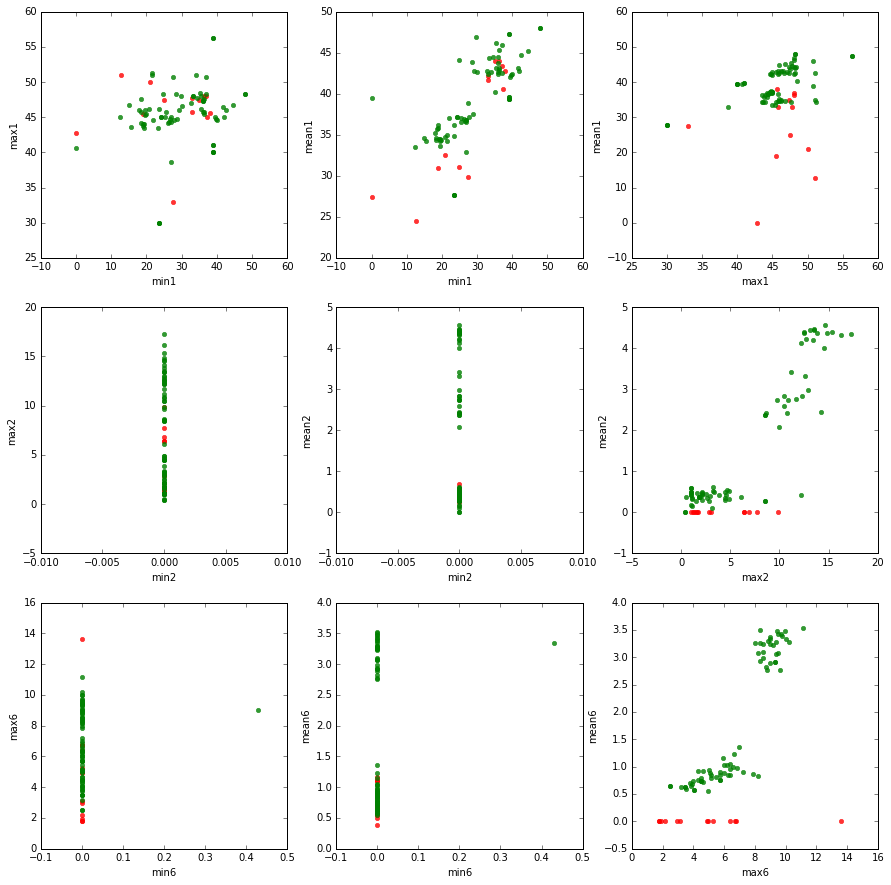

In [35]:
fig, axes = plt.subplots(3, 3, figsize=(15,15))
class1_df = newDataset.loc[newDataset['bending'] == 1]
class0_df = newDataset.loc[newDataset['bending'] == 0]

for i, ts in enumerate([1,2,6]):
    sb.regplot(class1_df['min'+str(ts)], class1_df['max'+str(ts)], ax=axes[i,0], fit_reg=False, color='red')
    sb.regplot(class0_df['min'+str(ts)], class0_df['max'+str(ts)], ax=axes[i,0], fit_reg=False, color='green')
    sb.regplot(class1_df['min'+str(ts)], class1_df['mean'+str(ts)], ax=axes[i,1], fit_reg=False, color='red')
    sb.regplot(class0_df['min'+str(ts)], class0_df['mean'+str(ts)], ax=axes[i,1], fit_reg=False, color='green')
    sb.regplot(class1_df['max'+str(ts)], class1_df['min'+str(ts)], ax=axes[i,2], fit_reg=False, color='red')
    sb.regplot(class0_df['max'+str(ts)], class0_df['mean'+str(ts)], ax=axes[i,2], fit_reg=False, color='green')

In [45]:
X_test = newDataset.iloc[:19,:42]
X_train = newDataset.iloc[19:,:42]
y_test = newDataset['bending'].head(19)
y_train = newDataset['bending'].iloc[19:]

logit = LogisticRegression(C=1000000.0)
logit.fit(X_train, y_train)
y_pred = logit.predict(X_test)
print("test error:", 1 - metrics.accuracy_score(y_test, y_pred))
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

test error: 0.0
Confusion matrix:
[[15  0]
 [ 0  4]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        15
          1       1.00      1.00      1.00         4

avg / total       1.00      1.00      1.00        19



### ii. Break each time series in your training set into two equal length time series. 
Now instead of 6 time series for each of the 88 instances, you have 12 time series for each instance. Repeat the experiment in 1(d)i.

In [42]:
time_domain_features = ['min','max','mean','median','std','1st_quart','3rd_quart']
def generateFeatureNames(tsNums, tdf):
    features = []
    for i in tsNums:
        for f in tdf:
            features.append(f+str(i))
    return features
features = generateFeatureNames(range(1,7), time_domain_features)

In [15]:
def breakTimeSeries(original_ds,n):
    '''
    Break each time series in instances into n (approximately) equal length time series
    Return a new dataset with 88*n rows
    '''
    data = []
    for ds in original_ds:
        df = ds[0]
        length = 480 // n
        for i in range(1, n+1):
            if(i == n):
                ts = df.iloc[(n-1)*length:, 1:7]
            else:
                ts = df.iloc[(i-1)*length:i*length, 1:7] #shorter time series
            stats = ts.describe()
            stats = stats.loc[['min','max','mean','50%','std','25%','75%']]
            #place all time-domain features of 6 time series in a row
            row = pd.Series(stats.values.flatten('F'), index=features)
            row['activity'] = ds[1]
            row['bending'] = 1 if(ds[1] == 'bending1' or ds[1] == 'bending2') else 0
            data.append(row)
    return pd.DataFrame(data)

In [43]:
new_ds2 = breakTimeSeries(datasets, 2)
X_test = new_ds2.iloc[:38,:42]
X_train = new_ds2.iloc[38:,:42]
y_test = new_ds2['bending'].head(38)
y_train = new_ds2['bending'].iloc[38:]

logit.fit(X_train, y_train)
y_pred = logit.predict(X_test)
print("test error:", 1 - metrics.accuracy_score(y_test, y_pred))
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

test error: 0.0
Confusion matrix:
[[30  0]
 [ 0  8]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        30
          1       1.00      1.00      1.00         8

avg / total       1.00      1.00      1.00        38



The test error of ii and i are both 0.

In [47]:
# code from online to calculate p values for sklearn logistic regression
# https://gist.github.com/rspeare/77061e6e317896be29c6de9a85db301d

from sklearn import linear_model
import scipy.stats as stat
class LogisticReg:
    """
    Wrapper Class for Logistic Regression which has the usual sklearn instance 
    in an attribute self.model, and pvalues, z scores and estimated 
    errors for each coefficient in 
    
    self.z_scores
    self.p_values
    self.sigma_estimates
    
    as well as the negative hessian of the log Likelihood (Fisher information)
    
    self.F_ij
    """
    
    def __init__(self,*args,**kwargs):#,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)#,**args)

    def fit(self,X,y):
        self.model.fit(X,y)
        #### Get p-values for the fitted model ####
        denom = (2.0*(1.0+np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X/denom).T,X) ## Fisher Information Matrix
        Cramer_Rao = np.linalg.inv(F_ij) ## Inverse Information Matrix
        sigma_estimates = np.array([np.sqrt(Cramer_Rao[i,i]) for i in range(Cramer_Rao.shape[0])]) # sigma for each coefficient
        z_scores = self.model.coef_[0]/sigma_estimates # z-score for eaach model coefficient
        p_values = [stat.norm.sf(abs(x))*2 for x in z_scores] ### two tailed test for p-values
        
        self.z_scores = z_scores
        self.p_values = p_values
        self.sigma_estimates = sigma_estimates
        self.F_ij = F_ij

### iii. Break each time series in your training set into l ∈ {1, 2, . . . , 20} time series of approximately equal length and use logistic regression4 to solve the binary classification problem.

I use backward selection algorithm to select features using sklearn.feature_selection.

The right way to cross validate is that when doing backward stepwise selection for each value of l, we use the cross-validated accuracy to select features, and then select the l with the highest cross-validated accuracy. We have to cross-validate for both l and features to be selected.

The wrong way is that when we select the best feature set for each l, we do not use cross validation. Only when we are choosing the best l, we compute cross-validated accuracy.

In [48]:
#geneate train set for each l value
train_sets = []
for l in range(1, 21):
    new_train = breakTimeSeries(train_data, l)
    train_sets.append(new_train)

In [71]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

cv_scores = []
pruned_feature_sets = []
feature_nums = []
for l in range(1, 21):
    new_train = train_sets[l - 1]
    X_train = new_train.iloc[:,:42]
    y_train = new_train['bending']
    logit = LogisticRegression()
    rfecv = RFECV(estimator=logit, step=1, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=9),
                  scoring='accuracy')
    rfecv.fit(X_train, y_train)
    cv_scores.append(max(rfecv.grid_scores_))
    selected=np.argwhere(rfecv.support_==True).flatten() #indices of selected features
    pruned_feature_sets.append(selected)
    feature_nums.append(rfecv.n_features_)

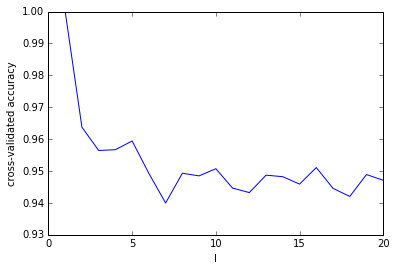

The best value of l is 1 and the best cross validation accuracy is 1.0


In [75]:
plt.plot(range(1,21), cv_scores)
plt.xlabel('l')
plt.ylabel('cross-validated accuracy')
plt.show()
best_l = np.argmax(cv_scores) + 1
best_accuracy = max(cv_scores)
print("The best value of l is", best_l, "and the best cross validation accuracy is", best_accuracy)

In [92]:
selected_indices = pruned_feature_sets[0]
selected = []
for i in selected_indices:
    selected.append(features[i])
print("When l = 1, we selecte " + str(len(selected)) + " features, and they are" )
print(selected)

When l = 1, we selecte 9 features, and they are
['mean1', '3rd_quart1', 'max2', 'median3', 'min5', 'max5', 'mean5', '1st_quart5', 'max6']


### iv. Confusion Matrix, ROC and AUC

Confusion matrix:
[[60  0]
 [ 0  9]]


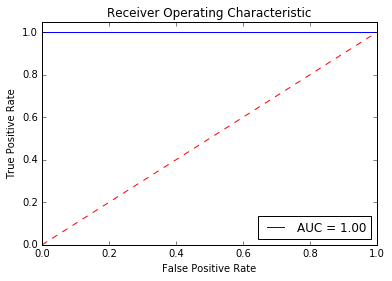

In [106]:
new_train = train_sets[0]
X_train = new_train.iloc[:,selected_indices]
y_train = new_train['bending']

logit = LogisticRegression()
classifier = logit.fit(X_train, y_train)
train_pred = classifier.predict(X_train)

print("Confusion matrix:")
print(metrics.confusion_matrix(y_train, train_pred))

#plot the ROC curve
def plotROC(y_train, y_pred):
    fpr, tpr, threshold = metrics.roc_curve(y_train, y_pred)
    roc_auc = metrics.auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1.05])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
plotROC(y_train, train_pred)

In [107]:
print('parameters of the logistic regression βi’s and the p-values associated with them:')

logitReg = LogisticReg()
logitReg.fit(X_train, y_train)

df = pd.DataFrame()
df['coefficient'] = classifier.coef_.flatten()
df['p-value'] = logitReg.p_values
df.index = selected
df

parameters of the logistic regression βi’s and the p-values associated with them:


,coefficient,p-value
mean1,-0.307066,0.856722
3rd_quart1,-0.382589,0.839248
max2,-0.279262,0.845267
median3,-0.228617,0.774596
min5,0.406708,0.768415
max5,0.654101,0.498395
mean5,0.304260,0.964205
1st_quart5,0.318413,0.946732
max6,-0.219730,0.895740


### v. Test the classifier on the test set

In [ ]:
X_test = newDataset[selected].head(19)
y_test = newDataset['bending'].head(19)
y_pred = classifier.predict(X_test)
print("test accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))

The accuracy on the test set and the cross-validation accuracy obtained previously are the same (1.0).

## (e) Binary Classification Using L1-penalized logistic regression
### i.

In [108]:
# from liblinearutil import *
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing

In [126]:
print("values of C used for cross validation:")
c_vals = np.append(np.logspace(-10,-1,10),np.arange(0.1, 1, 0.1))
c_vals = np.append(c_vals, range(1,10))
c_vals = np.append(c_vals, np.logspace(1,10,10))
print(c_vals)

values of C used for cross validation:
[1.e-10 1.e-09 1.e-08 1.e-07 1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01
 1.e-01 2.e-01 3.e-01 4.e-01 5.e-01 6.e-01 7.e-01 8.e-01 9.e-01 1.e+00
 2.e+00 3.e+00 4.e+00 5.e+00 6.e+00 7.e+00 8.e+00 9.e+00 1.e+01 1.e+02
 1.e+03 1.e+04 1.e+05 1.e+06 1.e+07 1.e+08 1.e+09 1.e+10]


In [122]:
best_Cs = []
cv_scores = []
for l in range(1, 21):
    new_train = train_sets[l - 1]
    X_train = new_train.iloc[:,:42]
    #standardize features
    X_train = preprocessing.scale(X_train)
    y_train = new_train['bending'].values
    logit_l1 = LogisticRegression(penalty='l1', solver='liblinear')
    param_grid = {'C': c_vals}
    clf = GridSearchCV(logit_l1, param_grid, cv=StratifiedKFold(5), scoring='accuracy')
    clf.fit(X_train, y_train)
    best_Cs.append(clf.best_params_["C"])
    cv_scores.append(clf.best_score_)

In [127]:
best_l = np.argmax(cv_scores)+1
best_c = best_Cs[best_l-1]
print("The best value of l is " + str(best_l) + ", and its corresponding best C is " 
      + str(best_c))

The best value of l is 1, and its corresponding best C is 0.30000000000000004


In [129]:
new_train = train_sets[0]
X_train = new_train.iloc[:,:42]
#standardize features
X_train = preprocessing.scale(X_train)
y_train = new_train['bending']
new_test = breakTimeSeries(test_data, 1)
X_test = new_test.iloc[:19,:42]
X_test = preprocessing.scale(X_test)
y_test = new_test['bending'].head(19)
#refit using the best C
clf = LogisticRegression(penalty='l1', solver='liblinear', C=0.3)
clf.fit(X_train, y_train)
print("Test accuracy is", clf.score(X_test, y_test))

Test accuracy is 0.8947368421052632


### ii.

Backward selection performs better than the L1-penalized. Backward selection is easier to implemented.

## (f) Multi-class Classification
### i. L1-penalized multinomial regression model

In [132]:
dic = {a : i for i, a in enumerate(activities)}

best_Cs = []
cv_scores = []
for l in range(1, 21):
    new_train = train_sets[l - 1]
    X_train = new_train.iloc[:,:42]
    #standardize features
    X_train = preprocessing.scale(X_train)
    y_train = new_train['activity'].apply(lambda a : dic[a])
    multi_logit = LogisticRegression(penalty='l1', tol=0.01, solver='saga', multi_class='multinomial')
    param_grid = {'C': c_vals}
    clf = GridSearchCV(multi_logit, param_grid, cv=StratifiedKFold(5), scoring='accuracy')
    clf.fit(X_train, y_train)
    best_Cs.append(clf.best_params_["C"])
    cv_scores.append(clf.best_score_)   

In [133]:
best_l = np.argmax(cv_scores)+1
best_c = best_Cs[best_l-1]
print("The best value of l is " + str(best_l) + ", and its corresponding best C is " 
      + str(best_c))

The best value of l is 1, and its corresponding best C is 0.7000000000000001


In [134]:
#refit with l=1 and C=0.7
new_train = train_sets[0]
X_train = new_train.iloc[:,:42]
#standardize features
X_train = preprocessing.scale(X_train)
y_train = new_train['activity'].apply(lambda a : dic[a])
X_test = newDataset.iloc[:19,:42]
X_test = preprocessing.scale(X_test)
y_test = newDataset['activity'].head(19).apply(lambda a : dic[a])
#refit using the best C
clf = LogisticRegression(penalty='l1',tol=0.01 , solver='saga', multi_class='multinomial', C=0.7)
clf.fit(X_train, y_train)

y_pred =  clf.predict(X_test)
print("Test error is", 1 - metrics.accuracy_score(y_test, y_pred))

Test error is 0.052631578947368474


In [135]:
print("Confusion matrix:")
metrics.confusion_matrix(y_test, y_pred)

Confusion matrix:


array([[2, 0, 0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0, 0],
       [0, 0, 3, 0, 0, 0, 0],
       [0, 0, 0, 3, 0, 0, 0],
       [0, 0, 0, 0, 3, 0, 0],
       [0, 0, 0, 0, 1, 2, 0],
       [0, 0, 0, 0, 0, 0, 3]])

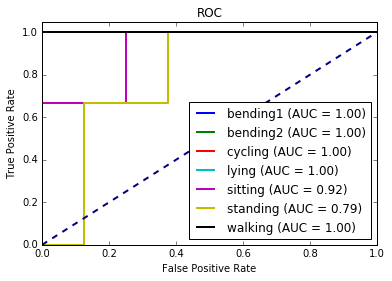

In [136]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

#plot ROC

# Binarize the output
y_train = label_binarize(y_train, classes=range(7))
y_test = label_binarize(y_test, classes=range(7))

clf = LogisticRegression(penalty='l1',tol=0.01,multi_class='multinomial', solver='saga', C=0.7)

# Learn to predict each class against the other
clf = OneVsRestClassifier(clf)
y_score = clf.fit(X_train, y_train).decision_function(X_test)
plt.figure()
lw = 2

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(7):
    # Compute ROC curve and ROC area for each class
    fpr[i], tpr[i], _ = metrics.roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i],
             lw=lw, label=activities[i] + ' (AUC = %0.2f)' % roc_auc[i])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

### ii. Using Naive Bayes’ classifier

Use Gaussian priors:

In [138]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import cross_val_score

In [139]:
def train_nb(nb_clf):
    cv_scores = []
    for l in range(1, 21):
        new_train = train_sets[l - 1]
        X_train = new_train.iloc[:,:42]
        y_train = new_train['activity'].apply(lambda a : dic[a])
        score = cross_val_score(nb_clf, X_train, y_train, cv=5).mean()
        cv_scores.append(score)
    return cv_scores

In [140]:
# train Gaussian Gaussian Naive Bayes
clf = GaussianNB()
gaussionNB_scores = train_nb(clf)
print("Gaussian Naive Bayes Classifier:")
best_l = np.argmax(gaussionNB_scores)+1
print("The best value of l is " + str(best_l))

Gaussian Naive Bayes Classifier:
The best value of l is 2


In [141]:
#refit with l=2
new_train = train_sets[1]
X_train = new_train.iloc[:,:42]
y_train = new_train['activity'].apply(lambda a : dic[a])
clf = GaussianNB()
clf.fit(X_train, y_train)
new_test = breakTimeSeries(test_data, 2)
X_test = new_test.iloc[:,:42]
y_test = new_test['activity'].apply(lambda a : dic[a])
y_pred =  clf.predict(X_test)
print("Test error is", 1 - metrics.accuracy_score(y_test, y_pred))

Test error is 0.10526315789473684


In [142]:
print("Confusion matrix:")
metrics.confusion_matrix(y_test, y_pred)

Confusion matrix:


array([[4, 0, 0, 0, 0, 0, 0],
       [0, 4, 0, 0, 0, 0, 0],
       [0, 0, 6, 0, 0, 0, 0],
       [0, 0, 0, 6, 0, 0, 0],
       [0, 0, 0, 1, 4, 1, 0],
       [0, 0, 0, 0, 2, 4, 0],
       [0, 0, 0, 0, 0, 0, 6]])

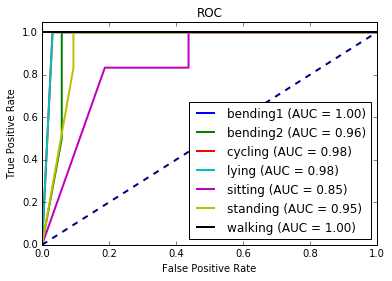

In [143]:
def plot_ROC_NB(X_train, y_train, X_test, y_test, clf):
    # Binarize the output
    y_train_bi = label_binarize(y_train, classes=range(7))
    y_test_bi = label_binarize(y_test, classes=range(7))

    plt.figure()
    lw = 2

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(7):
        #predict each class against the rest
        clf = clf.fit(X_train, y_train_bi[:, i])
        y_score = clf.predict_proba(X_test)
        # Compute ROC curve and ROC area for each class
        fpr[i], tpr[i], _ = metrics.roc_curve(y_test_bi[:, i], y_score[:,1])
        roc_auc[i] = metrics.auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i],
                 lw=lw, label=activities[i] + ' (AUC = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    plt.legend(loc="lower right")
    plt.show()
plot_ROC_NB(X_train, y_train, X_test, y_test, GaussianNB())

Use Multinomial priors:

In [144]:
multiNB_scores = train_nb(MultinomialNB())
print("Multinomial Naive Bayes Classifier:")
best_l = np.argmax(multiNB_scores)+1
print("The best value of l is " + str(best_l))

Multinomial Naive Bayes Classifier:
The best value of l is 1


In [145]:
#refit with l=1
new_train = train_sets[0]
X_train = new_train.iloc[:,:42]
y_train = new_train['activity'].apply(lambda a : dic[a])
clf.fit(X_train, y_train)
new_test = breakTimeSeries(test_data, 2)
X_test = new_test.iloc[:,:42]
y_test = new_test['activity'].apply(lambda a : dic[a])
y_pred =  clf.predict(X_test)
print("Test error is", 1 - metrics.accuracy_score(y_test, y_pred))

Test error is 0.26315789473684215


Confusion matrix:


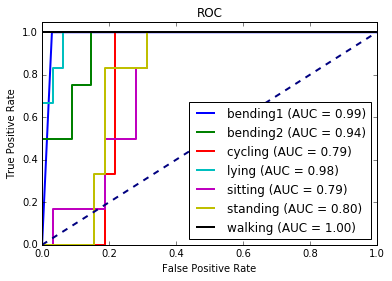

In [146]:
print("Confusion matrix:")
metrics.confusion_matrix(y_test, y_pred)
#show ROC curves
plot_ROC_NB(X_train, y_train, X_test, y_test, MultinomialNB())

Gaussian Naive Bayes classfier has smaller test error than that of Multinomial Naive Bayes.

### iii. Which method is better for multi-class classification in this problem?

L1- penalized multinomial regression model has the smallest test error out of the three. So it is better for multi-class classification in this problem.